# Mathjax
<script id="MathJax-script" async
  src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js">
</script>

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {
      inlineMath: [['$','$'], ['\\(','\\)']],
      processEscapes: true},
      jax: ["input/TeX","input/MathML","input/AsciiMath","output/CommonHTML"],
      extensions: ["tex2jax.js","mml2jax.js","asciimath2jax.js","MathMenu.js","MathZoom.js","AssistiveMML.js", "[Contrib]/a11y/accessibility-menu.js"],
      TeX: {
      extensions: ["AMSmath.js","AMSsymbols.js","noErrors.js","noUndefined.js"],
      equationNumbers: {
      autoNumber: "AMS"
      }
    }
  });
</script>


**Mathjax config Source**:
[fabriziomusacchio](https://www.fabriziomusacchio.com/blog/2021-08-10-How_to_use_LaTeX_in_Markdown/)

# Specification

In This python file the Design Specifications for Chip [tt10-uR-IPs](https://github.com/jonoboderbonobo/tt10-uR-IPs) is investigated.
To get Specifications we first need some Requirements.





### Power Conversion (PC) – Actuators

| **Metric**                               | **Unit**      | **Description**                                                                   |
|------------------------------------------|---------------|-----------------------------------------------------------------------------------|
| Conversion Efficiency (η_PC)             | %| Ratio of mechanical output energy to electrical input energy.                     |
| Actuation Force                          | N   | Mechanical force produced by the actuator.                                        |
| Displacement / Stroke                    | µm       | Amount of movement generated per actuation cycle.                                |
| Resonant Frequency                       | Hz    | Frequency at which the actuator operates most efficiently.                        |
| Response Time / Rise Time                | ms      | Time taken for the actuator to reach full displacement after activation.          |
| Voltage-to-Displacement Sensitivity      | µm/V          | Displacement achieved per unit of applied voltage.                               |







# Approaches on Requirements

### Economic Perspective  
To make this project economically viable, it is essential to identify a **specific application** that provides added value to society—**satisfying customer needs**.

### Scientific Perspective  
From a scientific standpoint, the project should focus on an aspect that **advances understanding** within the scientific community—**securing research funding**.

### My Approach  
My approach lies somewhere in the middle. I draw inspiration from:  

- **Microscopic robots with onboard digital control** – Reynolds et al., 2022 [(DOI: 10.1126/scirobotics.abq2296)](https://doi.org/10.1126/scirobotics.abq2296)  
- Previous and subsequent works by **Paul McEuen and Alyosha Molnar**, including:  
  - [10.1109/ISSCC.2018.8310299 (2018)](https://doi.org/10.1109/ISSCC.2018.8310299)  
  - [10.1109/TBCAS.2018.2876069 (2018)](https://doi.org/10.1109/TBCAS.2018.2876069)  
  - [10.1073/pnas.1919677117 (2020)](https://doi.org/10.1073/pnas.1919677117)  
  - [10.1109/JMEMS.2020.2999496 (2020)](https://doi.org/10.1109/JMEMS.2020.2999496)  
  - [10.1038/s41586-020-2626-9 (2020) in Nature](https://doi.org/10.1038/s41586-020-2626-9)  

I aim to **replicate and improve** upon these works using **open-source PDKs**.
Beyond improving arbitrary technical metrics, I want to identify **a useful application** that can serve as a **showcase product** to influence research funding committees and investors and push the field of microrobotics forward.


# Requirements (High-Level)

### Hard Requirements

| **Metric**                    | **Value**                  |
|-------------------------------|----------------------------|
| Robot size                    | 100 µm × 100 µm            |
| Chip size                     | 50 µm × 100 µm             |
| Resulting Space for Actuators | 2 × (25 µm × 100 µm)        |
| Robot speed                   | > 1 body length/second     |

### Soft Requirements

| **Metric**                     | **Value**         |
|--------------------------------|-------------------|
| Actuation Method               | Piezoelectric     |
| Locomotion Method              | Crawling          |
| Shape Robot                    | Rectangular       |
| Coating Robot                  | PDMS              |
| Actuators Robot                | PZT_5H            |
| Fluid Environment              | Air               |
| Solid Environment (Ground)     | Variable (SiO2)   |

# Design Steps (Power System)
- Determine Model for Locomotion and Actuation
- From HL-Requirements and Actuation Model determine Actuation Requirements
- From Actuation Requirements determine Drivers requirements
- check if its in range of Power Harvesting possibilities

# Design Steps (Information System)
- Determine needed Data Rate
- Determine needed Clock Speed
- Determine needed Clock Stability
- Determine needed Frequencies
- Either add additional oscialltors or Frequency dividers

## Requirements on Driver

- **Voltage Level (Displacement):** As high as possible for maximum displacement. At this scale, it is limited by the breakdown voltage of the piezo actuator rather than MOSFETs.
- **Current Level (Speed):** Low enough resistance, i.e., high enough current for the respective oscillation frequency of the actuator. The limiting factors could be:
    - Heat dissipation of MOSFETs inside the driver circuit
    - Heat dissipation of the piezo crystal
    - Frequency where actuation is efficient due to gait, friction, drag, and mechanical quality factor 

# Gait
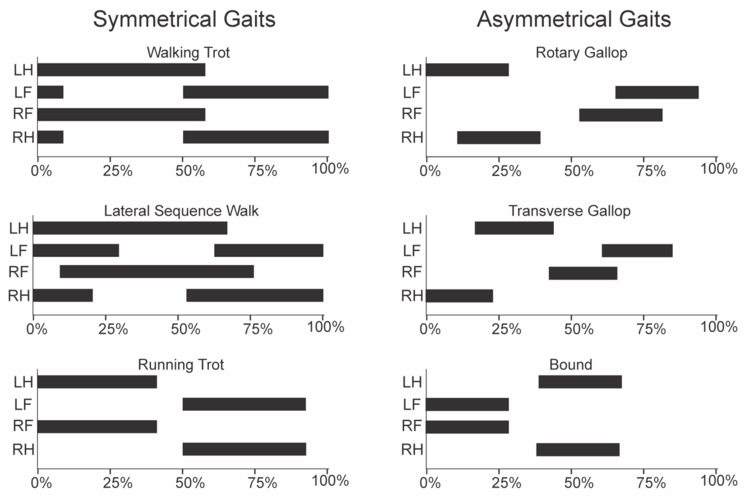

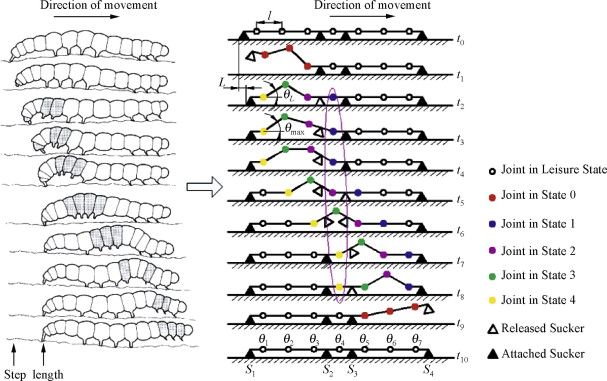

https://www.sciencedirect.com/science/article/pii/S1002007109002871

#  Summary LL-Requirements

Those lower level requirements can be split into Power Requirements and Data Requirements.

## Power Requirements

### 1. Power Harvesting (PH)

| **Metric**                   | **Unit**        | **Description**                                                             |
|------------------------------|-----------------|-----------------------------------------------------------------------------|
| Total Harvested Power        | Watts (W)       | Net electrical power generated under standard operating conditions.         |
| Harvesting Efficiency (η_PH) | % or Fraction   | Ratio of electrical power harvested to the incident energy.                 |
| Area of Harvesting Module    | m²              | Physical area occupied by the harvesting device.                            |
| Volume of Harvesting Module  | m³              | Physical volume occupied by the harvester.                                  |
| Power Density (Area)         | W/m²            | Harvested power normalized by area.                                         |
| Power Density (Volume)       | W/m³            | Harvested power normalized by volume.                                       |
| Open-Circuit Voltage         | Volts (V)       | Voltage measured when no load is connected.                                 |
| Short-Circuit Current        | Amperes (A)     | Current measured when the output is shorted.                                |



### 2. Power Distribution (PD)

| **Metric**                         | **Unit**         | **Description**                                                                |
|------------------------------------|------------------|--------------------------------------------------------------------------------|
| Distribution Efficiency (η_PD)     | % or Fraction    | Ratio of power delivered to the load relative to the input power.              |
| Voltage Regulation Accuracy        | % or mV/V        | Accuracy with which the output voltage matches the desired value under load.   |
| Maximum Output Voltage             | Volts (V)        | Highest reliable output voltage provided by the distribution circuit.          |
| Maximum Output Current             | Amperes (A)      | Highest current deliverable without significant losses.                      |
| Quiescent Power Consumption        | Watts (W) or µW  | Standby power usage when no load is applied.                                   |
| Response Time                      | Seconds (s) or ms| Time required to stabilize the output after an input change.                   |


### 3. Power Conversion (PC) – Actuators

| **Metric**                               | **Unit**      | **Description**                                                                   |
|------------------------------------------|---------------|-----------------------------------------------------------------------------------|
| Conversion Efficiency (η_PC)             | % or Fraction | Ratio of mechanical output energy to electrical input energy.                     |
| Actuation Force                          | Newtons (N)   | Mechanical force produced by the actuator.                                        |
| Displacement / Stroke                    | m or µm       | Amount of movement generated per actuation cycle.                                |
| Resonant Frequency                       | Hertz (Hz)    | Frequency at which the actuator operates most efficiently.                        |
| Response Time / Rise Time                | s or ms       | Time taken for the actuator to reach full displacement after activation.          |
| Voltage-to-Displacement Sensitivity      | µm/V          | Displacement achieved per unit of applied voltage.                               |


### 4. Power Application (PA) – Locomotion & Gait

| **Metric**                         | **Unit**                          | **Description**                                                             |
|------------------------------------|-----------------------------------|-----------------------------------------------------------------------------|
| Locomotion Speed                   | Body lengths/s or µm/s            | Speed at which the robot travels relative to its own dimensions.            |
| Step Frequency / Gait Cycle        | Hertz (Hz)                        | Number of actuation cycles (steps) per second.                              |
| Gait Efficiency                    | Distance per cycle                | Distance covered per actuation cycle.                                       |
| Energy Consumption per Distance    | Joules per meter (J/m)            | Electrical energy used to travel a unit distance.                           |
| Traction Force                     | Newtons (N) or µN                 | Effective force applied to overcome friction.                               |
| Direction Change Response Time     | Seconds (s) or ms                 | Time required to change direction or adjust the gait.                       |



## Data Requirements

### 1. Data Harvesting (DH) – Sensors

| **Metric**                   | **Unit**                      | **Description**                                                                  |
|------------------------------|-------------------------------|----------------------------------------------------------------------------------|
| Sensor Sensitivity           | Depends on Sensor             | Minimum detectable change in the measured parameter.                           |
| Signal-to-Noise Ratio        | Decibels (dB)                 | Ratio of signal strength to background noise.                                  |
| Response Time / Latency      | Milliseconds (ms) or µs       | Delay between the stimulus and sensor response.                                |
| Resolution                   | Bits or Physical Units        | Smallest detectable change in the measured parameter.                          |
| Dynamic Range                | dB or Ratio                   | Range over which the sensor can accurately detect input.                       |
| Power Consumption            | Watts (W) or µW               | Energy required to operate the sensor.                                         |
| Operating Range              | Depends on Sensor             | Range over which the sensor maintains performance.                             |



### 2. Data Storage (DS) – Memory

| **Metric**                   | **Unit**                   | **Description**                                                            |
|------------------------------|----------------------------|----------------------------------------------------------------------------|
| Memory Capacity              | Bits or Bytes              | Total amount of data that can be stored.                                   |
| Access Time / Latency        | Nanoseconds (ns) or µs     | Time required for a single read/write operation.                           |
| Data Retention Time          | Years or Hours             | Duration data is reliably stored without power.                           |
| Endurance (Write Cycles)     | Number                     | Maximum number of write/erase cycles before degradation.                   |
| Power Consumption            | Watts (W) or µW            | Energy usage during read/write operations.                                 |
| Physical Footprint           | µm²                        | Area required for the memory circuitry.                                    |



### 3. Data Conversion (DC) – Computing

| **Metric**                            | **Unit**              | **Description**                                                               |
|---------------------------------------|-----------------------|-------------------------------------------------------------------------------|
| Processing Speed / Clock Frequency    | MHz or GHz            | Maximum operating frequency of the processor.                                 |
| Throughput / Instructions per Second  | MIPS                  | Number of instructions executed per second.                                   |
| Energy per Operation                  | J/op or nJ/op         | Average energy consumed per computation or instruction.                       |
| Latency                               | ms or µs              | Time delay from input to computed output.                                     |
| Power Consumption                     | Watts (W) or µW       | Total power required for the computing core.                                  |
| Computational Efficiency              | Operations per Watt   | Number of operations performed per unit of energy.                            |
| Memory Bandwidth                      | Bits per Second (bps) | Data transfer rate between the processor and memory.                          |



### 4. Data Distribution (DD) – Communication

| **Metric**                         | **Unit**                       | **Description**                                                               |
|------------------------------------|--------------------------------|-------------------------------------------------------------------------------|
| Data Rate / Throughput             | bps or Mbps                    | Maximum rate at which data can be transmitted or received.                    |
| Communication Latency              | ms or µs                       | Time delay from data transmission to reception.                              |
| Communication Range                | Meters (m)                     | Maximum effective distance for reliable communication.                       |
| Bit Error Rate (BER)               | Ratio (Dimensionless)          | Fraction of bits received in error relative to total bits transmitted.         |
| Channel Bandwidth                  | Hertz (Hz)                     | Frequency range used for communication.                                      |
| Transmission Power                 | mW or µW                       | Power used during data transmission.                                         |
| Modulation/Spectral Efficiency     | bps/Hz                         | Efficiency of the modulation scheme in utilizing the available bandwidth.    |
| Power Consumption                  | Watts (W) or µW                | Energy required to operate the communication circuit.                        |

In [1]:
import os
print(os.getcwd())

/home/jonobo/eda/designs/tt10-uR-IPs/docs/specs


In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("/styles/custom.css", "r").read()
    return HTML(styles)
#css_styling()